<a href="https://colab.research.google.com/github/tejasmanchi/ML-mini-projects/blob/main/Time_Series_Learning_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import statsmodels.api as sms
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DS/ML Datasets/airline_passengers.csv')
df.dropna(inplace=True)
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [ ]:
df.columns=['month','passenger']

In [ ]:
df['month']=pd.to_datetime(df['month'])

In [ ]:
from statsmodels.tsa.stattools import adfuller

def perform_adfuller_test(data):
    # Perform Augmented Dickey-Fuller test
    result = adfuller(data)

    # Extract and return the test statistics and p-value
    test_statistic = result[0]
    p_value = result[1]

    return test_statistic, p_value

test_statistic, p_value = perform_adfuller_test(df['passenger'])

print('Test Statistic:', test_statistic)
print('p-value:', p_value)

Test Statistic: 0.8153688792060528
p-value: 0.9918802434376411


In [ ]:
df['passenger first diff'] = df['passenger']-df['passenger'].shift(1)
df.head()

,month,passenger,passenger first diff
0,1949-01-01,112.0,NaN
1,1949-02-01,118.0,6.0
2,1949-03-01,132.0,14.0
3,1949-04-01,129.0,-3.0
4,1949-05-01,121.0,-8.0


In [ ]:
test_statistic, p_value = perform_adfuller_test(df['passenger first diff'].dropna())

print('Test Statistic:', test_statistic)
print('p-value:', p_value)

Test Statistic: -2.829266824169999
p-value: 0.05421329028382552


In [ ]:
df['passenger second diff'] = df['passenger first diff']-df['passenger first diff'].shift(1)
df.head()

,month,passenger,passenger first diff,passenger second diff
0,1949-01-01,112.0,NaN,NaN
1,1949-02-01,118.0,6.0,NaN
2,1949-03-01,132.0,14.0,8.0
3,1949-04-01,129.0,-3.0,-17.0
4,1949-05-01,121.0,-8.0,-5.0


In [ ]:
test_statistic, p_value = perform_adfuller_test(df['passenger second diff'].dropna())

print('Test Statistic:', test_statistic)
print('p-value:', p_value)

Test Statistic: -16.38423154246854
p-value: 2.7328918500140445e-29


In [ ]:
df['passenger 12 diff'] = df['passenger']-df['passenger'].shift(12)
test_statistic, p_value = perform_adfuller_test(df['passenger 12 diff'].dropna())

print('Test Statistic:', test_statistic)
print('p-value:', p_value)

Test Statistic: -3.383020726492481
p-value: 0.011551493085514952


In [ ]:
df.tail()

,month,passenger,passenger first diff,passenger second diff,passenger 12 diff
139,1960-08-01,606.0,-16.0,-103.0,47.0
140,1960-09-01,508.0,-98.0,-82.0,45.0
141,1960-10-01,461.0,-47.0,51.0,54.0
142,1960-11-01,390.0,-71.0,-24.0,28.0
143,1960-12-01,432.0,42.0,113.0,27.0


In [ ]:
splitindex=pd.to_datetime('1955-12-1')

In [ ]:
df.set_index('month',inplace=True)

In [ ]:
traindata=df[df.index<splitindex]
testdata=df[df.index>splitindex]

In [ ]:
testdata.head()

,passenger,passenger first diff,passenger second diff,passenger 12 diff
month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0


#Sarimax model

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

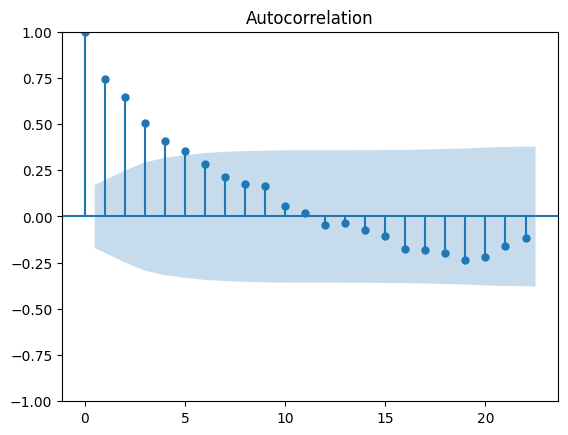

In [ ]:
acf=plot_acf(df['passenger 12 diff'].dropna())

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


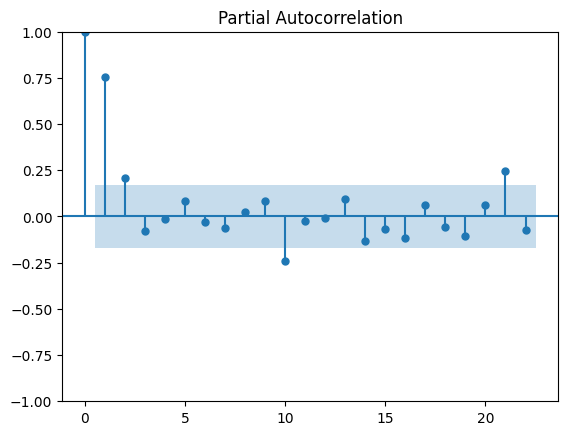

In [ ]:
pacf=plot_pacf(df['passenger 12 diff'].dropna())

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(traindata['passenger'],order=(3,0,5),seasonal_order=(3,1,5,12))
sarimax=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                           passenger   No. Observations:                   83
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -261.506
Date:                             Wed, 21 Jun 2023   AIC                            541.012
Time:                                     06:28:58   BIC                            561.376
Sample:                                 01-01-1949   HQIC                           549.110
                                      - 11-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6638      0.278     -2.384      0.017      -1.210      -0.118
ar.L2          0.7231      0.092      7.840      0.000       0.542       0.904
ar.L3          0.8710      0.253      3.441      0.001       0.375       1.367
ma.L1          1.4793      0.453      3.264      0.001       0.591       2.368
ma.L2          0.6579      0.461      1.427      0.154      -0.246       1.562
ma.L3         -0.3557      0.262     -1.359      0.174      -0.869       0.157
ma.L4         -0.3909      0.250     -1.567      0.117      -0.880       0.098
ma.L5         -0.2772      0.171     -1.617      0.106      -0.613       0.059
sigma2        88.1290     20.825      4.232      0.000      47.312     128.946
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 1.51
Prob(Q):                              0.77   Prob(JB):                         0.47
Heteroskedasticity (H):               1.84   Skew:                             0.35
Prob(H) (two-sided):                  0.14   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred_start=testdata.index[0]
pred_end=testdata.index[-1]
print(pred_start)
print(pred_end)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [ ]:
pred=sarimax.predict(start=pred_start,end=pred_end)
residuals=testdata['passenger']-pred

<Axes: ylabel='Density'>

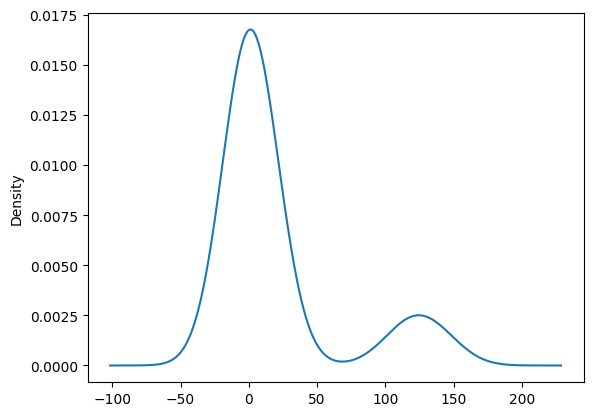

In [ ]:
sarimax.resid.plot(kind='kde')

In [ ]:
testdata['Predicted_Sarimax']=pred

<ipython-input-47-866a9a6e3ac4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
testdata

,passenger,passenger first diff,passenger second diff,passenger 12 diff,Predicted_Sarimax
month,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,276.420458
1956-02-01,277.0,-7.0,-13.0,44.0,268.874151
1956-03-01,317.0,40.0,47.0,50.0,302.947227
1956-04-01,313.0,-4.0,-44.0,44.0,304.204661
1956-05-01,318.0,5.0,9.0,48.0,303.871082
1956-06-01,374.0,56.0,51.0,59.0,349.283057
1956-07-01,413.0,39.0,-17.0,49.0,396.398428
1956-08-01,405.0,-8.0,-47.0,58.0,379.785869
1956-09-01,355.0,-50.0,-42.0,43.0,343.524678


<Axes: xlabel='month'>

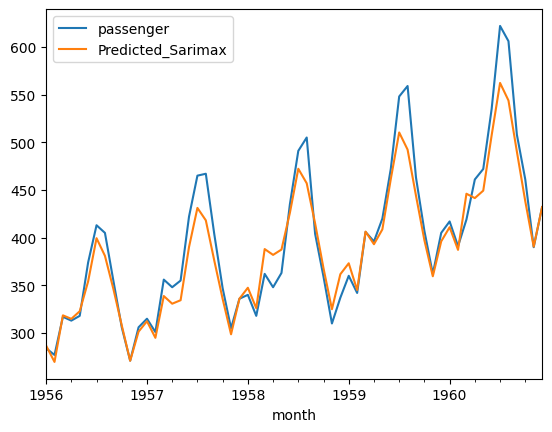

In [ ]:
testdata[['passenger','Predicted_Sarimax']].plot()

In [ ]:
fig=px.line(testdata,x=testdata.index,y=['passenger','Predicted_Sarimax'])
fig.show()

In [ ]:
from pandas.tseries.offsets import DateOffset
futuredates=[df.index[-1]+DateOffset(months=x)for x in range(0,24)]

In [ ]:
futuredates

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00')]

In [ ]:
futuredatesdf=pd.DataFrame(index=futuredates[1:],columns=df.columns)
# Futuredates[1:]: This slices the futuredates array starting from the second element (index 1) until the end.
# The purpose is to exclude the first element from the futuredates array.

In [ ]:
futuredatesdf.head()

,passenger,passenger first diff,passenger second diff,passenger 12 diff
1961-01-01,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN


In [ ]:
futuredf=pd.concat([df,futuredatesdf])
futuredf

,passenger,passenger first diff,passenger second diff,passenger 12 diff
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1962-07-01,NaN,NaN,NaN,NaN
1962-08-01,NaN,NaN,NaN,NaN
1962-09-01,NaN,NaN,NaN,NaN
1962-10-01,NaN,NaN,NaN,NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning:

Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.



<Axes: >

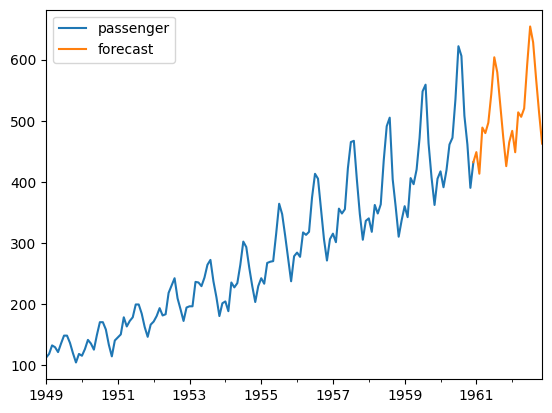

In [ ]:
forcaststart='1960-12-1'
forecastend='1962-11-01'
futuredf['forecast']=sarimax.predict(start=forcaststart,end=forecastend,dynamic=True)
futuredf[['passenger','forecast']].plot()

In [ ]:
df.tail()

,passenger,passenger first diff,passenger second diff,passenger 12 diff,forecast
month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,NaN
1960-09-01,508.0,-98.0,-82.0,45.0,NaN
1960-10-01,461.0,-47.0,51.0,54.0,NaN
1960-11-01,390.0,-71.0,-24.0,28.0,NaN
1960-12-01,432.0,42.0,113.0,27.0,432.111809
